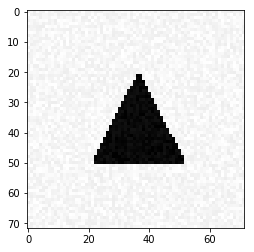

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils
from keras.callbacks import History 


def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((72,72))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]



# Partie 1 - Simple classification

In [3]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [4]:
X_train[0]

array([0.94199143, 0.99807865, 0.96529364, ..., 0.9673603 , 0.97514598,
       0.99341282])

In [5]:
Y_train = np_utils.to_categorical(Y_train,3)
X_train, Y_train

(array([[0.94199143, 0.99807865, 0.96529364, ..., 0.9673603 , 0.97514598,
         0.99341282],
        [0.98593208, 0.95913481, 0.93590246, ..., 0.94260054, 0.94578904,
         0.94101371],
        [0.95449921, 0.97592602, 0.94711375, ..., 0.9825268 , 0.98596082,
         0.94246449],
        ...,
        [0.98400455, 0.94195286, 0.99786731, ..., 0.94972293, 0.98337468,
         0.99114846],
        [0.98864737, 0.93371794, 0.95981962, ..., 0.98826084, 0.93294249,
         0.96534596],
        [0.9712856 , 0.96264034, 0.93932593, ..., 0.99604649, 0.99186014,
         0.961185  ]]), array([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0

In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_train.shape

(300, 5184)

In [8]:
from keras.models import Sequential 
from keras import utils
model = Sequential()

from keras.layers import Dense, Activation, Flatten

model.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))
#model.add(Flatten())
#model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam)


model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
300/300 [==============================] - 1s 4ms/step - loss: 1.3948
Epoch 2/100
300/300 [==============================] - 0s 163us/step - loss: 0.6821
Epoch 3/100
300/300 [==============================] - 0s 165us/step - loss: 0.5362
Epoch 4/100
300/300 [==============================] - 0s 172us/step - loss: 0.3921
Epoch 5/100
300/300 [==============================] - 0s 168us/step - loss: 0.2935
Epoch 6/100
300/300 [==============================] - 0s 162us/step - loss: 0.2631
Epoch 7/100
300/300 [==============================] - 0s 162us/step - loss: 0.2202
Epoch 8/100
300/300 [==============================] - 0s 156us/step - loss: 0.2187
Epoch 9/100
300/300 [==============================] - 0s 166us/step - loss: 0.2437
Epoch 10/100
300/300 [==============================] - 0s 172us/step - loss: 0.2236
Epoch 11/100
300/300 [==============================] - 0s 172us/step - loss: 0.1669
Epoch 12/100
300/300 [==============================] - 0s 162us/step - loss

300/300 [==============================] - 0s 153us/step - loss: 0.0080
Epoch 98/100
300/300 [==============================] - 0s 149us/step - loss: 0.0070
Epoch 99/100
300/300 [==============================] - 0s 146us/step - loss: 0.0069
Epoch 100/100
300/300 [==============================] - 0s 151us/step - loss: 0.0069


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [10]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

# Partie 2 - Visualization of the solution

In [11]:
weights = model.get_weights()
weightMat = np.asarray(weights[0])

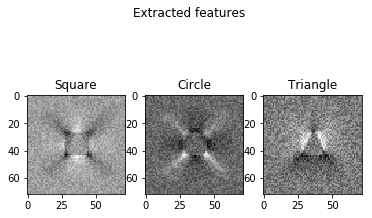

In [60]:
plt.figure(); plt.suptitle('Extracted features');
plt.subplot(1, 3, 1)
plt.imshow(weightMat[:,0].reshape(72,72),cmap='gray')
plt.title('Square')
plt.subplot(1, 3, 2)
plt.imshow(weightMat[:,1].reshape(72,72),cmap='gray')
plt.title('Circle')

plt.subplot(1, 3, 3)
plt.imshow(weightMat[:,2].reshape(72,72), cmap='gray')
plt.title('Triangle')

plt.savefig('figures/part2_features')

plt.show()

# Partie 3 - A More Difficult Classification Problem

In [43]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)
Y_train = utils.np_utils.to_categorical(Y_train,3)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


## Classifieur linéaire

In [44]:
from keras.models import Sequential 
from keras import utils
model2 = Sequential()

from keras.layers import Dense, Activation, Flatten

history3 = History()


model2.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))
#model.add(Flatten())
#model.add(Dense(3, activation='softmax'))

from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


model2.fit(X_train, Y_train, epochs=40, batch_size=32, validation_data = (X_test, Y_test), callbacks=[history3])

Train on 300 samples, validate on 300 samples
Epoch 1/40
300/300 [==============================] - 0s 1ms/step - loss: 1.9700 - acc: 0.3667 - val_loss: 2.6708 - val_acc: 0.3333
Epoch 2/40
300/300 [==============================] - 0s 288us/step - loss: 1.7345 - acc: 0.3900 - val_loss: 1.6607 - val_acc: 0.4600
Epoch 3/40
300/300 [==============================] - 0s 278us/step - loss: 1.1510 - acc: 0.4467 - val_loss: 1.0932 - val_acc: 0.3400
Epoch 4/40
300/300 [==============================] - 0s 264us/step - loss: 1.0688 - acc: 0.4733 - val_loss: 0.9505 - val_acc: 0.5033
Epoch 5/40
300/300 [==============================] - 0s 262us/step - loss: 0.9022 - acc: 0.5600 - val_loss: 0.9568 - val_acc: 0.5533
Epoch 6/40
300/300 [==============================] - 0s 272us/step - loss: 0.8681 - acc: 0.5700 - val_loss: 0.9102 - val_acc: 0.5767
Epoch 7/40
300/300 [==============================] - 0s 262us/step - loss: 0.8649 - acc: 0.5600 - val_loss: 0.8966 - val_acc: 0.5733
Epoch 8/40
300/300

In [30]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [31]:
evaluation = model2.evaluate(X_test, Y_test)
evaluation

300/300 [==============================] - 0s 216us/step


[0.7805130855242411, 0.5999999992052714]

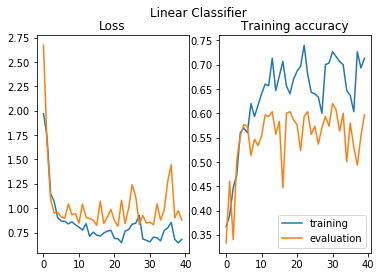

In [53]:
plt.figure(); plt.suptitle('Linear Classifier');
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('Loss')


plt.subplot(1, 2, 2)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.legend(['training','evaluation'])


plt.title('Training accuracy')
plt.savefig('figures/part3_linear')
plt.show()

In [49]:
history3.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## CNN

In [38]:
X_train.shape
X_train.reshape(X_train.shape[0],72,72,1)

In [56]:
from keras.models import Sequential 
from keras import utils
model3 = Sequential()

from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import History 
history = History()

model3.add(Conv2D(16, (5,5), input_shape=(72,72,1)   )    )
model3.add( MaxPooling2D() )
model3.add(Flatten())
model3.add(Dense(3, input_shape=(X_train.shape[1],), activation='softmax'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model3.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


model3.fit(X_train.reshape(X_train.shape[0],72,72,1), Y_train, epochs=25, batch_size=32,  callbacks=[history], validation_data = (X_test.reshape(X_test.shape[0],72,72,1), Y_test),)

Train on 300 samples, validate on 300 samples
Epoch 1/25
300/300 [==============================] - 0s 2ms/step - loss: 2.2656 - acc: 0.3167 - val_loss: 1.3258 - val_acc: 0.3300
Epoch 2/25
300/300 [==============================] - 0s 496us/step - loss: 1.2659 - acc: 0.3833 - val_loss: 1.1966 - val_acc: 0.3333
Epoch 3/25
300/300 [==============================] - 0s 496us/step - loss: 1.0563 - acc: 0.3933 - val_loss: 1.0578 - val_acc: 0.4833
Epoch 4/25
300/300 [==============================] - 0s 497us/step - loss: 0.9624 - acc: 0.6467 - val_loss: 0.9650 - val_acc: 0.5200
Epoch 5/25
300/300 [==============================] - 0s 501us/step - loss: 0.8907 - acc: 0.6167 - val_loss: 0.9187 - val_acc: 0.6100
Epoch 6/25
300/300 [==============================] - 0s 493us/step - loss: 0.8412 - acc: 0.7433 - val_loss: 0.8818 - val_acc: 0.6633
Epoch 7/25
300/300 [==============================] - 0s 488us/step - loss: 0.8057 - acc: 0.7200 - val_loss: 0.8459 - val_acc: 0.6467
Epoch 8/25
300/300

In [40]:
[X_test, Y_test] = generate_test_set_classification()
X_test = X_test.reshape(X_test.shape[0],72,72,1)
evaluation = model3.evaluate(X_test, Y_test)
evaluation

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 0s 275us/step


[0.7252303568522135, 0.6833333333333333]

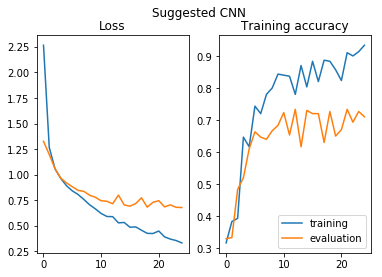

In [57]:
plt.figure(); plt.suptitle('Suggested CNN');
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','evaluation'])


plt.title('Training accuracy')
plt.savefig('figures/part3_cnn')
plt.show()

## Big Fat CNN

In [ ]:
fat = Sequential()

from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import History 
history2 = History()

fat.add(Conv2D(48, (12,12), input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]) , activation='relu' )    )
fat.add(Conv2D(96, (5,5), activation='relu'  )    )
fat.add( MaxPooling2D() ) 

fat.add(Flatten())
fat.add(Dense(96, activation='relu'))

fat.add(Dense(3,  activation='softmax'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
fat.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])


fat.fit(X_train2, Y_train2, epochs=25, batch_size=32,  callbacks=[history2])


In [ ]:
fat.evaluate(X_test, Y_test)

In [ ]:
plt.figure(); plt.suptitle('Deeper CNN');
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.title('Loss')


plt.subplot(1, 2, 2)
plt.plot(history2.history['acc'])
plt.title('Training accuracy')
plt.savefig('figures/part3_deeper_cnn')
plt.show()

# Partie 4 - Regression

In [ ]:
[X_train, Y_train] = generate_dataset_regression(300, 20)


In [ ]:
visualize_prediction(X_train[1], Y_train[1])

In [ ]:
X_train = X_train.reshape(X_train.shape[0],72,72,1)
X_train.shape

In [ ]:
X_train.shape[1]


In [ ]:
from keras.models import Sequential 
from keras import utils
model4 = Sequential()

from keras.layers import Dense, Activation, Flatten, Dropout

model4.add(Conv2D(32, (10,10), input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])   )    )
model4.add(Dropout(0.4))
model4.add( MaxPooling2D() )
model4.add(Flatten())

model4.add(Dense(128, activation = 'linear'))
model4.add(Dropout(0.4))
model4.add(Dense(6, activation = 'linear'))


from keras.optimizers import SGD, adam
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9, nesterov=True) 
adam = adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model4.compile(loss='mean_squared_error', optimizer='rmsprop')


model4.fit(X_train, Y_train, epochs=400, batch_size=2)

In [ ]:
model4.summary()

In [ ]:
Y_n

In [ ]:
[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(X_test.shape[0],72,72,1)

In [ ]:
Y_test = model4.predict(X_test)
Y_test2 = model4.predict(X_train)

In [ ]:
i=2
visualize_prediction(X_train[i], (Y_test2[i]))

In [ ]:
Y_test[0]

In [ ]:
Y_train.shape

In [ ]:
Y_test[0]

In [ ]:
Y_train[0]

In [ ]:
np_utils.to_categorical(Y_train[3], 3) 